
# Week 10: Linear Regression
In this section, we will learn how to perform simple linear regression on a dataset.


### What is Linear Regression?

Linear regression is a method used to model the relationship between two variables by fitting a linear equation to observed data.
- The variable we are predicting is called the **dependent variable** (or response variable, `Y`).
- The variable we use to make predictions is called the **independent variable** (or predictor variable, `X`).

In this case, we are using horsepower as our independent variable (X) and mpg (miles per gallon) as our dependent variable (Y).

The goal is to find the **best-fit line** for the data. This line minimizes the sum of the squared differences between the observed values and the predicted values. This is known as **least squares regression**.

---

#### What does the regression output mean?

- **Intercept**: The value of Y when X is zero. This is the point where the line crosses the Y-axis.
- **Slope (Coefficient)**: The amount by which Y changes for a unit increase in X.
- **R-squared**: This tells us how well the model explains the variability in the data. A higher R-squared value (closer to 1) indicates a better fit.
- **p-value**: Helps determine whether the relationship between X and Y is statistically significant.

---

We will start with a simple linear regression model and then extend it to a multiple regression model.

Our focus will be on understanding how the models are built and interpreted.

---

## SETUP

In [2]:
!pip install ISLP

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# if you need those
# pip install numpy pandas scipy seaborn statsmodels

**If you are using Google Colab, after installing, it might be necessary to restart the kernel.**

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from ISLP import load_data
from ISLP.models import (ModelSpec, summarize , poly)
import matplotlib.pyplot as plt
import seaborn as sns

Also import the statsmodels library.

We will use this library to build our regression models.

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 1. Loading the Dataset
The first step is to load the dataset and explore its structure. This will help us understand what variables are available and how they might relate to each other.


Reference: [Boston Dataset](https://islp.readthedocs.io/en/latest/datasets/Boston.html)

**Data Dictionary:**

- 1. `crim`     per capita crime rate by town
- 2. `zn`       proportion of residential land zoned for lots over 25,000 sq.ft.
- 3. `indus`    proportion of non-retail business acres per town
- 4. `chas`     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- 5. `nox`      nitric oxides concentration (parts per 10 million)
- 6. `rm`       average number of rooms per dwelling
- 7. `age`      proportion of owner-occupied units built prior to 1940
- 8. `dis`      weighted distances to five Boston employment centres
- 9. `rad`      index of accessibility to radial highways
- 10. `tax`      full-value property-tax rate per \$10,000
- 11. `pratio`  pupil-teacher ratio by town
- 12. `lstat`    % lower status of the population
- 13. `medv`     Median value of owner-occupied homes in \$1000's

In [6]:
df = load_data("Boston")
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [8]:
# verify dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [9]:
# verify statistics
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### 2. Explore correlations
In this step, we will explore the relationship between the variables using correlations and scatter plots.

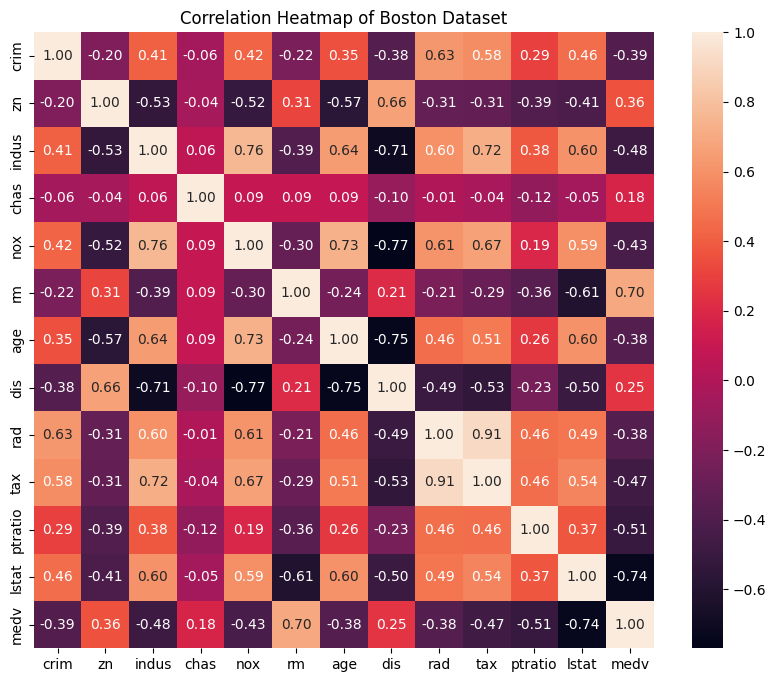

In [10]:
# your code here
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Boston Dataset")
plt.show()


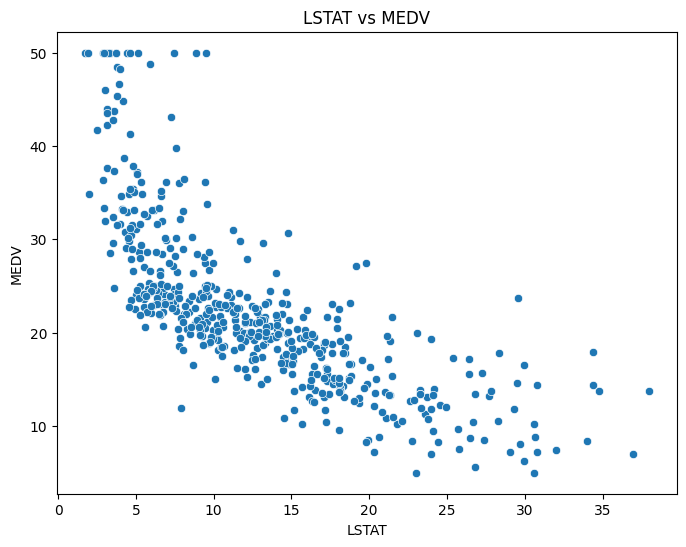

In [11]:
# your code hereprint(model.summary())

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='lstat', y='medv')
plt.title("LSTAT vs MEDV")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()


### 3. Select a `response variable` and a `predictor` based on the correlation between them

In [12]:
# your code here
# we are selecting medv as the response variable
df.corr()['medv'].sort_values(ascending=True)


lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

In [13]:
# your code here
# we are selecting lstat as the predictor variable


### 4. What does using these variables in the model mean in simpler terms?

your answer here

### 5. Scatter plot the response and predictor variables

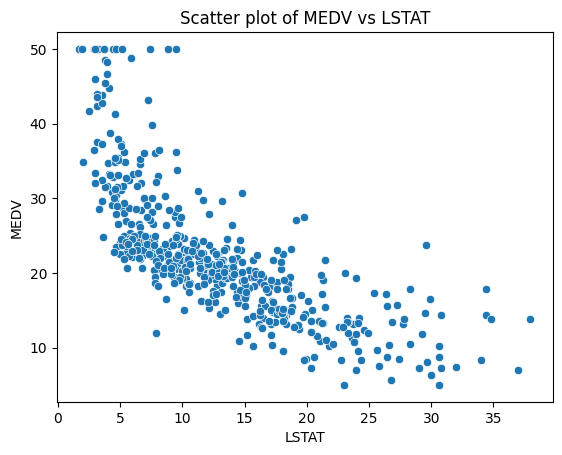

In [14]:
# your code here
sns.scatterplot(data=df, x='lstat', y='medv')
plt.title("Scatter plot of MEDV vs LSTAT")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()


### 6. Verify for the statistical significance between the variables.

In [15]:
# your code here
stats.pearsonr(df['lstat'], df['medv'])


PearsonRResult(statistic=np.float64(-0.7376627261740148), pvalue=np.float64(5.08110339438743e-88))

In [16]:
# your code here
stats.spearmanr(df['lstat'], df['medv'])


SignificanceResult(statistic=np.float64(-0.8529141394922163), pvalue=np.float64(2.221727524313283e-144))

### 7. Define and Fit the Linear Regression Model

A simple linear regression model examines the relationship between two variables: one `independent variable (predictor)` and one `dependent variable (response)`.

We will use the **least squares** method to fit the best line to the data.

- Define X and y
- add the constant to the X variable using `sm.add_contant(target)`
- define the Linear Regression Model using `sm.OLS(y, X)`
- fit the model using `.fit()`
- use the `.summary()` and interpret the results

Note: The function `sm.add_constant()` adds a column of ones to the predictor variable in order to include the intercept term in the regression model.

In [17]:
# your code here
x = df['lstat']
y = df['medv']


In [18]:
X = sm.add_constant(x)


In [19]:
# your code here
model = sm.OLS(y, X).fit()

In [20]:
# define, fit and obtain the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           5.08e-88
Time:                        09:28:23   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

### 8. Analyze the results

### Interpreting the Summary Output

The summary output provides a detailed report on the regression analysis:

- **R-squared**: This tells us how much of the variation in the dependent variable is explained by the independent variable.
  - An R-squared value of 0.544 means that 54.4% of the variability in the dependent variable (medv) can be explained by lstat.
  
- **p-value**: The p-value tells us whether the relationship between the variables is statistically significant.
  - A very small p-value (usually < 0.05) means that there is a significant relationship between the variables.

- **F-statistic**: This measures the overall significance of the regression model. A high F-statistic suggests that the model is statistically significant.

A Step-by-step breakdown of summary

Based on the  `model.params` output.
- `model.params['const']` is the **intercept** of the regression line.
- `model.params[predictor]` is the **slope** of the regression line.

In [21]:
# your code here


In [22]:
# your code here


**You can check those on the `.summary()` table again**

### Interpreting the Regression Coefficients

The regression coefficients give us information about the relationship between the independent and dependent variables.

- The `intercept` tells us the **expected value of** the **dependent variable** when the **independent variable is 0.**

- The `slope` tells us **how much the dependent variable changes** for a **one-unit change in the independent variable.**

**These parameters are used to create the equation of the regression line: `Y = slope * X + intercept`.**

---
Take note of the following:
- A good fit is when the points are close to the line.
- Large deviations from the line indicate that the model might not be capturing the true relationship between the variables.



### Plotting the Regression Line
To better understand the relationship, we can plot the regression line on top of the scatter plot.

This allows us to visualize how well the model fits the data.


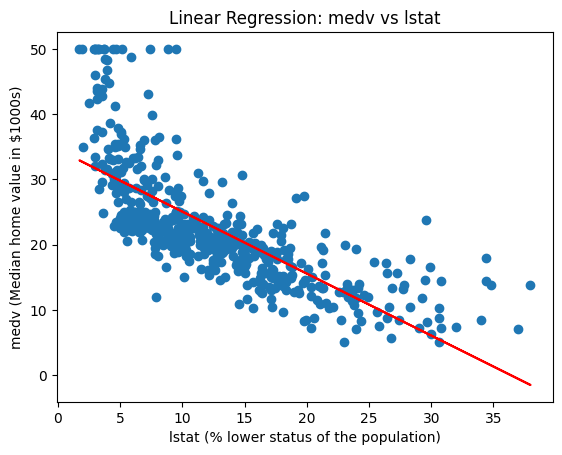

In [23]:
plt.scatter(df['lstat'], df['medv'])
plt.xlabel(f'lstat (% lower status of the population)')
plt.ylabel('medv (Median home value in $1000s)')
plt.title('Linear Regression: medv vs lstat')

# predicted values based on the existing X data
y_pred = model.predict(sm.add_constant(df['lstat']))

plt.plot(df['lstat'], y_pred, color='red')
plt.show()

### Diagnostic Plots?

Diagnostic plots help us evaluate the quality of the regression model. We will look at the following types of plots:

1. **Residual Plot**: This shows the difference between the observed values and the predicted values. A good fit should show random scatter around zero, with no obvious pattern.
2. **Normal Q-Q Plot**: This plot checks if the residuals (errors) follow a normal distribution. If the points lie on a straight line, the residuals are normally distributed.
3. **Leverage Plot**: This helps identify influential points (outliers) that have a strong effect on the model.

The analysis of these plots can determine if the assumptions of the linear regression model are violated. For example, if the residuals are not normally distributed or show a clear pattern, this indicates a problem with the model.

---

As you create the diagnostic plots, keep in mind the following:
- **Homoscedasticity**: Residuals should have constant variance (not increasing or decreasing systematically).
- **Linearity**: The relationship between X and Y should be linear.
- **Normality of Residuals**: The residuals should follow a normal distribution.

Let’s now proceed to create these plots.


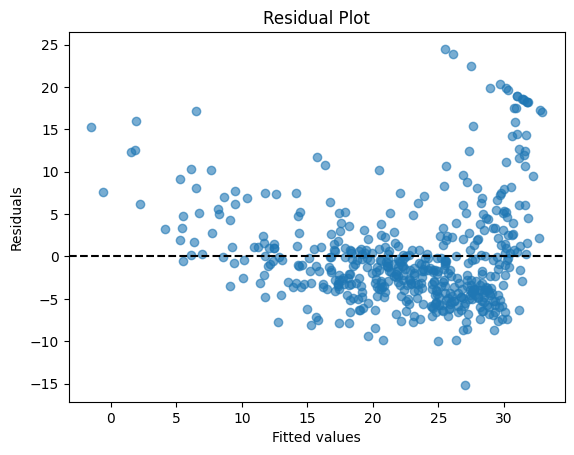

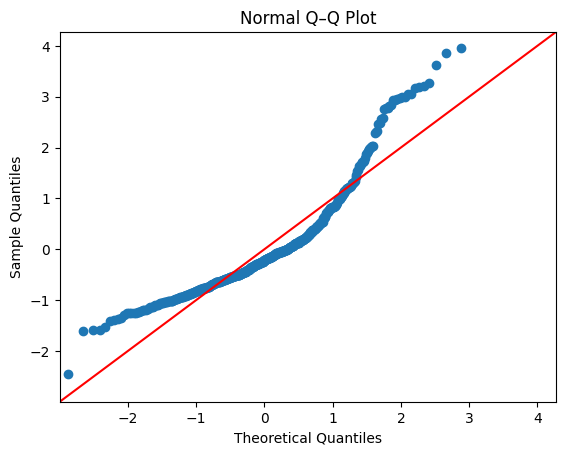

In [24]:
# calculate fitted values and residuals
fitted = model.fittedvalues
residuals = model.resid

# create residual plot
plt.scatter(fitted, residuals, alpha=0.6)
plt.axhline(0, color='black', linestyle='--')  # Reference line at 0
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Interpretation:
# A good fit should show residuals randomly scattered around zero,
# with no visible pattern (no curve or funnel shape).

# create a Q–Q plot of residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q–Q Plot')
plt.show()

### 9. So, we created a model. Now let's try to predict the values of medv given a value of lstat.

- Create a **new DataFrame** with the target values `'lstat':[5, 10, 15]`.



In [25]:
# your code here


### 10. Using the `get_prediction()` function:

- Obtain the **expected values for `medv`**

In [26]:
# add a constant term (intercept)


# use get_prediction() function to obtain predictions
# this will provide the expected (mean) values of 'medv' and their intervals


# summarize the results


### 11. Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

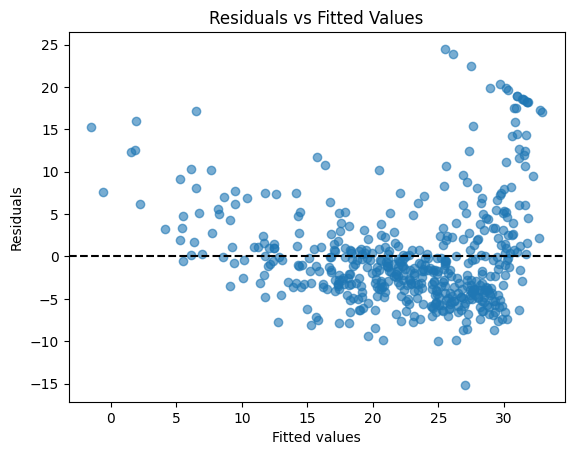

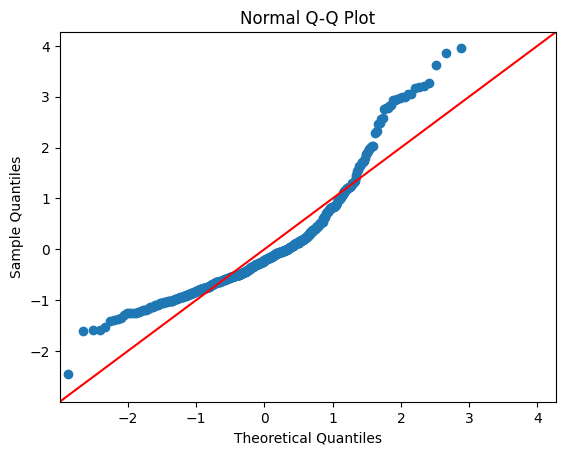

In [27]:
# get fitted values, residuals, and influence statistics
fitted = model.fittedvalues
residuals = model.resid
standardized_residuals = model.get_influence().resid_studentized_internal
leverage = model.get_influence().hat_matrix_diag

# ==========================
# 1. Residuals vs Fitted Plot
# ==========================
plt.scatter(fitted, residuals, alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Interpretation:
# A good fit should show random scatter around zero.
# A curved or funnel pattern suggests non-linearity or unequal variance.

# ==========================
# 2. Normal Q-Q Plot
# ==========================
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Interpretation:
# If residuals are normally distributed, points should fall approximately along the 45° line.


## Let's Practice a bit more!

### 1. Load the `Auto.csv` dataset obtained from the repository.

In [28]:
Auto = pd.read_csv("./Auto.csv")

In [29]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [30]:
# verify dataset info
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


### 2. Preprocess the dataset if you find any problem on it

In [31]:
# find non numeric values
non_numeric = Auto[~Auto['horsepower'].str.isnumeric()]
print(non_numeric)


      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
32   25.0          4          98.0          ?    2046          19.0    71   
126  21.0          6         200.0          ?    2875          17.0    74   
330  40.9          4          85.0          ?    1835          17.3    80   
336  23.6          4         140.0          ?    2905          14.3    80   
354  34.5          4         100.0          ?    2320          15.8    81   

     origin                  name  
32        1            ford pinto  
126       1         ford maverick  
330       2  renault lecar deluxe  
336       1    ford mustang cobra  
354       2           renault 18i  


In [32]:
# your code here
# replace non numeric values with average of horsepower
Auto2 = Auto.copy()
Auto2['horsepower'] = pd.to_numeric(Auto2['horsepower'], errors='coerce')

# median of valid horsepower values
median_horsepower = Auto2['horsepower'].median()

# replace non numeric values with median
Auto2['horsepower'] = Auto2['horsepower'].fillna(median_horsepower)

Auto2['horsepower'].dtype


dtype('float64')

### 3. Select one variable as the response and one as the predictor.

- Analyze the correlation between variables
- `.corr(numeric_only=True)` will help
- plot the correlation matrix, its faster to analyze using it

In [33]:
# lets analyze the correlation between variables
Auto2.corr(numeric_only=True)['mpg'].sort_values

<bound method Series.sort_values of mpg             1.000000
cylinders      -0.776260
displacement   -0.804443
horsepower     -0.773582
weight         -0.831739
acceleration    0.422297
year            0.581469
origin          0.563698
Name: mpg, dtype: float64>

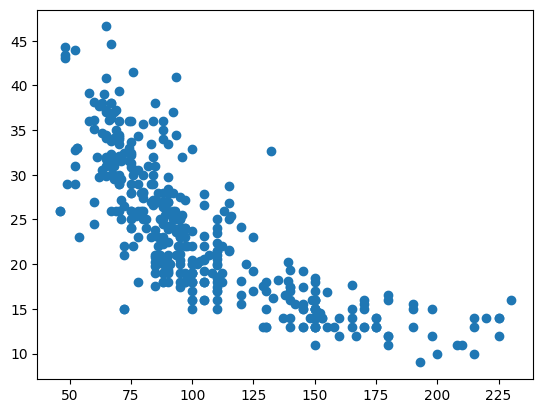

In [34]:
# correlation matrix
plt.scatter(Auto2['horsepower'], Auto2['mpg'])
plt.show()


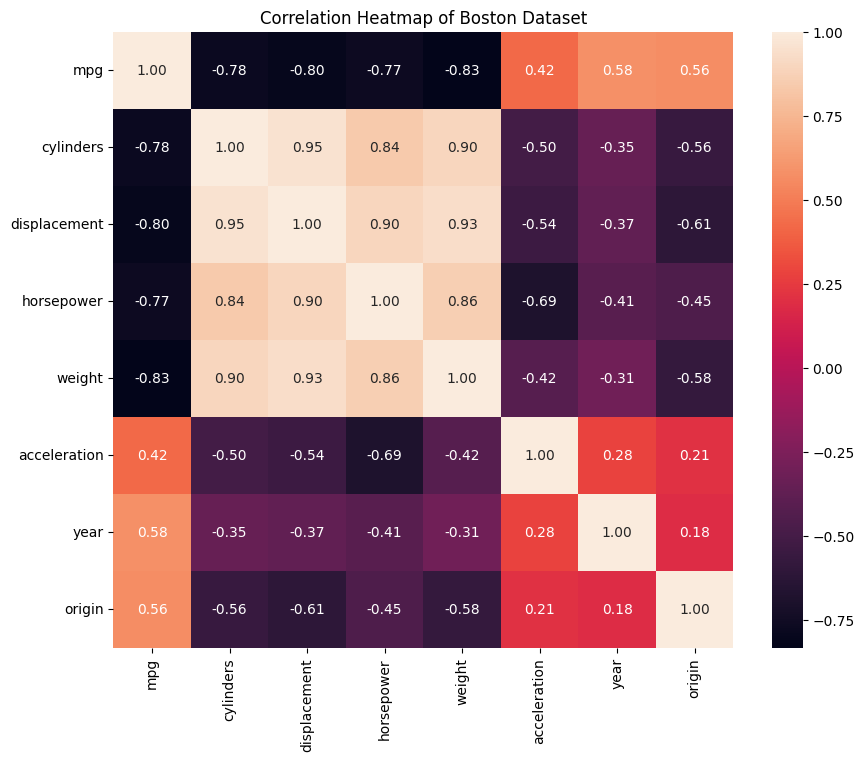

In [35]:
# lets find the correlation with other variables
corr = Auto2.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Boston Dataset")
plt.show()

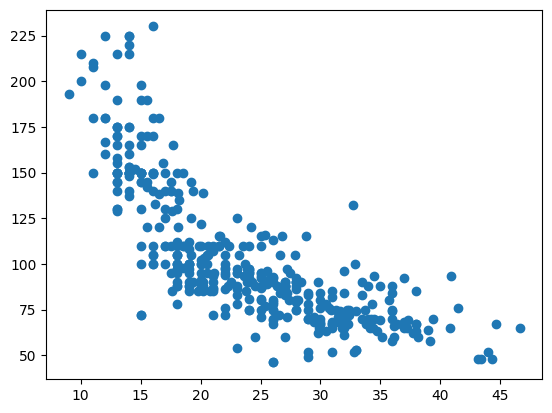

In [36]:
# lets inspect the scatterplot of this association
plt.scatter(Auto2['mpg'], Auto2['horsepower'])
plt.show()


In [37]:
#spearman correlation
stats.spearmanr(Auto2['mpg'], Auto2['horsepower'])

SignificanceResult(statistic=np.float64(-0.848049574029796), pvalue=np.float64(5.452406674545506e-111))

In [38]:
#pearson correlation
stats.pearsonr(Auto2['mpg'], Auto2['horsepower'])

PearsonRResult(statistic=np.float64(-0.7735824727347412), pvalue=np.float64(2.86425510137425e-80))

### 4. Use the `sm.OLS(`) function to perform a simple linear regression with `mpg` as the response and the `chosen predictor`. Use the `summarize()` function to print the results. Comment on the output.

In [39]:
# lets define X and y
X = sm.add_constant(Auto2['horsepower'])
y = Auto2['mpg']

In [ ]:
# define and fit the model
auto_model = sm.OLS(y, X).fit()

In [44]:
# obtain the summary
print(auto_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     588.6
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           2.86e-80
Time:                        09:31:09   Log-Likelihood:                -1198.5
No. Observations:                 397   AIC:                             2401.
Df Residuals:                     395   BIC:                             2409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0213      0.725     55.239      0.0

### 5. What is the estimated regression equation for the fitted model?

In [ ]:
# your code here

### 6. Is there a relationship between the predictor and the response?

In [ ]:
# your answer
#
#
#

### 7. How strong is the relationship between the predictor and the response?

In [ ]:
# your answer
#
#
#

### 8. Is the relationship between the predictor and the response positive or negative?

In [ ]:
# your answer
#
#
#

### 9. What is the predicted `mpg` associated with the chosen predictor set to the `quantile(0.75)` of it? What are the associated 95 % confidence and prediction intervals?

In [ ]:
# verify the quantile of the chosen predictor

In [ ]:
# create a new DataFrame with the given value


# add constant term if not already present


# guarantee correct order of columns


# predict for the given value


**Note that the model predicts that a car with 125 horsepower has an average mpg of around 20.25 (max mean of 20.80) with a 95% confidence interval, lower bound of aproximately 10.47, upper bound of 30.02 and mean_se error of 0.28 which indicates a relatively low level of uncertainty around the prediction.**

### 10. Plot the response and the predictor. Display the least squares regression line.

In [ ]:
# your code here


### 11. Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

In [ ]:
# Normal Q-Q Plot


In [ ]:
# Residuals vs Fitted


### Conclusions:

-


#